# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

**Context**

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives:**

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

**Instructions**

1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info).

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

7. Plot a correlation matrix, comment what you see.

8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

9. Comment what you can see in the plots.

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

11. Did you find outliers? Comment what you will do with them.

12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

https://github.com/NicolasVollmer/lab-cleaning-numerical-data

In [90]:
import pandas as pd
import numpy as np

In [91]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [92]:
pd.set_option('display.max_columns', None)

In [93]:
display(customer_df.shape)
display(customer_df.head())

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [94]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)


In [95]:
def cleanup(df):
    cols = []
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_'))
    df.columns = cols
    df.rename(columns={'employmentstatus':'employment_status'}, inplace=True)

In [96]:
cleanup(customer_df)

In [97]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

#### Change effective to date column to datetime format.

In [98]:
customer_df['effective_to_date'].nunique

<bound method IndexOpsMixin.nunique of 0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object>

looks like m/d/y format

In [99]:
# customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m%d%y')

customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')


In [100]:
customer_df['effective_to_date'].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

#### Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

To start, I will treat objects as discrete and numerical data as continuous. Date can technically be considered either, but I will assign it to the discrete set as there are several repeating dates. Equally, some numerical categories where the count of distinct values compared to the total number of rows is less than 20 variables I would consider to be categorical and therefore discrete. Will try to sum this into a function.

In [101]:
# first divide numerical and categorical

customer_df_num = customer_df.select_dtypes(include = np.number)
customer_df_cat = customer_df.select_dtypes(include = object)    


In [102]:
# my initial function attempt

# cont_cols = []
# disc_cols = []

# def variable_split(df):
      
#     for col in df.columns:

#         if df[col].dtype == 'datetime64[ns]':
#             disc_cols.append(col)
#         elif df[col].dtype == 'object':
#             disc_cols.append(col)
#         elif df[col].dtype == 'np.number' and df[col].nunique() <= 20:
#             disc_cols.append(col)
#         else cont_cols.append(col)


In [103]:
# cannot get the above to return a df, just lists... 
# I thought next to maybe going in reverse by copying and dropping, but that worked
# even less


# def variable_split(df):
    
#     cont_cols = []
#     disc_cols = []
    
#     for col in df.columns:
#         if df[col].dtype == 'datetime64':
#             continuous_df.drop(df[col])
#         elif df[col].dtype == 'object':
#             continuous_df.drop(df[col])
#         elif df[col].dtype == 'int64' and df[col].nunique() <= 20:
#             continuous_df.drop(df[col])
#         elif df[col].dtype == 'int64':
#             discrete_df.drop(df[col])
#         elif df[col].dtype == 'float64':
#             discrete_df.drop(df[col])


my stabs at creating a function are shown above, what I failed to get was have them spit out a dataframe, not a list. After getting some help from Philip and Ferreira, I got close to what Erin had shown us later, but as I preferred Erins method of using a percentage instead of a fixed value I took over her function below.

In [104]:
# add column names to list, then use list to append columns to dfs

def variable_split(df):
    discrete_cols = []
    continuous_cols = []    
    
    for col in df.columns:

        if len(df[col].unique()) < (df.shape[0] * 0.01): #len(df[col])
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)
            
    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]
    
    return discrete_df, continuous_df


In [105]:
discrete_df, continuous_df = variable_split(customer_df_num)

In [106]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [107]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


#### Plot a correlation matrix, comment what you see.


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns


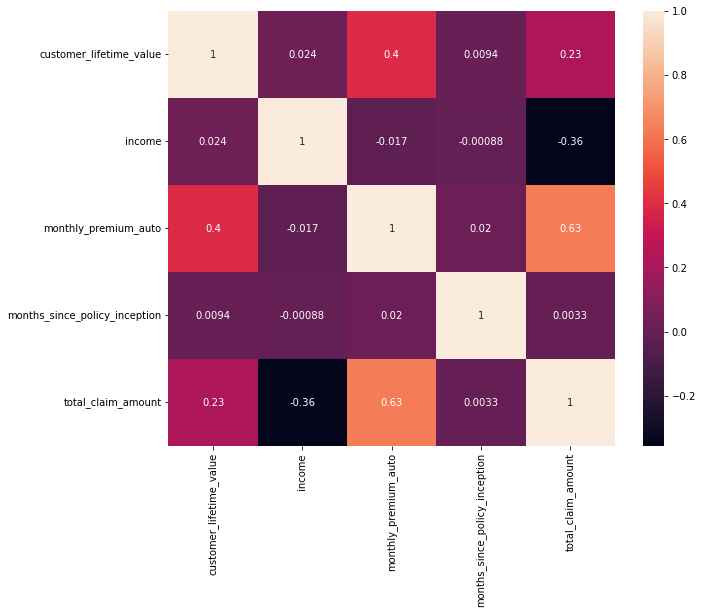

In [109]:
correlations_matrix = continuous_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, annot=True)
plt.show()

based on my correlation matrix above, I see that total claim amount has some correlation with customers' monthly premium payments. This would make sense, as having received payment for insurance claims would mean that your monthly premium would rise. There seems to be some minor correlation to customer lifetime value, which also makes sense, that people with fewer or no claims over a long period would be valued higher by an insurer. 

Additionally, I see some higher correlation between monthly premium and customer lifetime value. Again, this is sensible as higher monthly payments would factor in when calculating lifetime value.

Lastly, there is some lesser correlation between total claim amount and income - this would likely make sense as higher income customers are likely to drive fancier cars that would cost more in claims, I actually expected it to be a bit higher. Maybe wealthier clients can afford to fix some scrapes by themselves to avoid a higher premium?

Some oddities I noticed: I would have expected a higher correlation between months since policy inception to lifetime value and monthly premium.

#### Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)


In [110]:
# discrete_df, continuous_df

In [111]:
def discrete_plts(df):
    for column in df.columns:
        sns.countplot(x=df[column])
        plt.show()
    return None

In [112]:
def continuous_plts(df):
    for column in df.columns:
        sns.displot(x=df[column])
        plt.show()
    return None

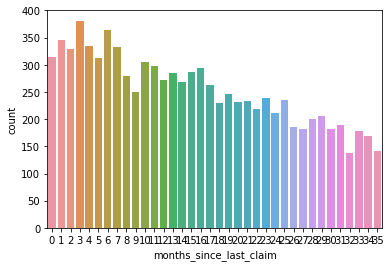

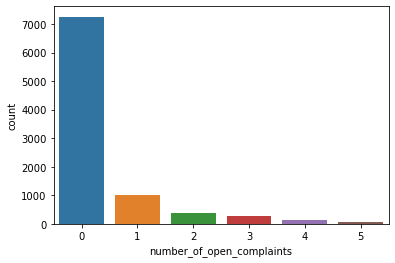

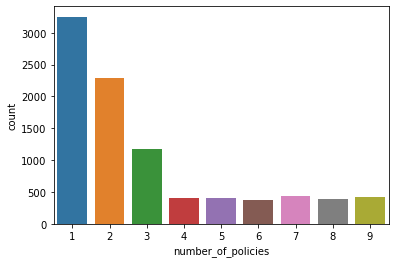

In [113]:
categorical_plts(discrete_df)

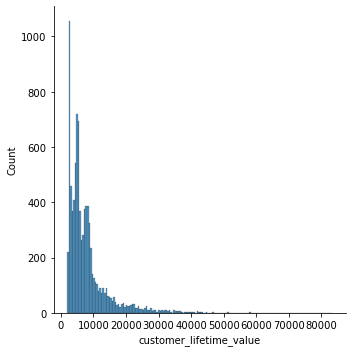

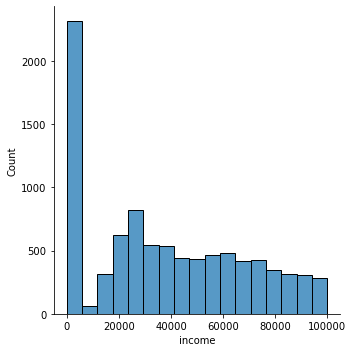

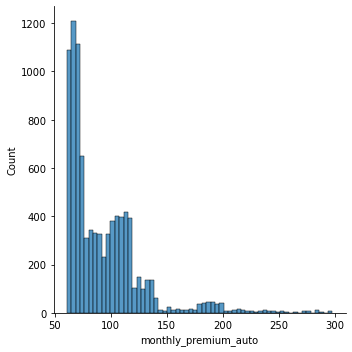

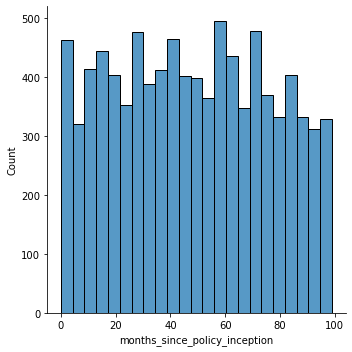

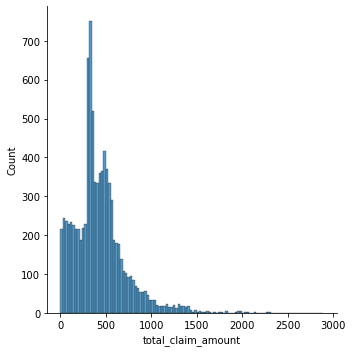

In [114]:
continuous_plts(continuous_df)

#### Comment what you can see in the plots.


in the plots for **discrete_df**, I basically see visualisations of the bin sizes for each variable, i.e. how many customers have gone x amount of months since their last insurance claim, how many customers have x amount of open complaints, and how many customers have x amount of policies.

In the plots for **continuous_df** I first see customer lifetime value charted out - most customers are rated on the lower end in a range of ca. 2,500 to 10,000 in value.
There is a income chart, the majority of customers are on the lowest income tier.
Monthly premium is looking similar to the income and lifetime value charts in terms of distribution, again majorly balanced towards the lower end.
Months since policy inception is fairly unintersting, and seems quite balanced in distribution.
Lastly, total claim amount is interestingly not fully leaning towards the front, while there is a noticable cluster starting at 0, the real spike of claim amounts comes at around 400 with a noticable drop from ca. 500 to 1,000 and a few outliers thereafter.

I can overall see some of the correlations in the continuous plots.

#### Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)


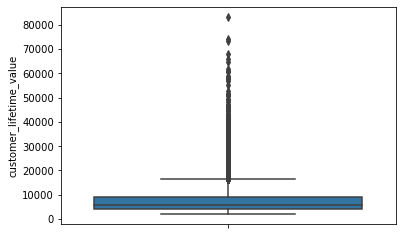

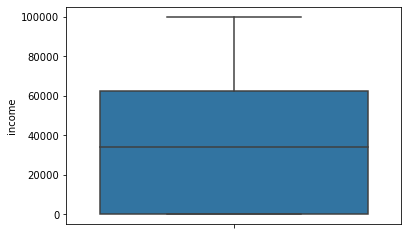

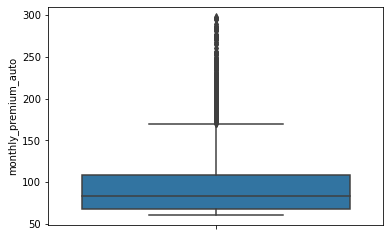

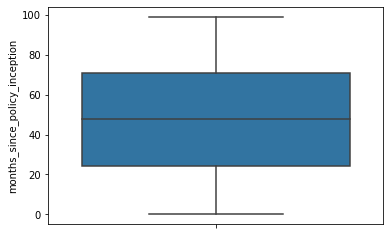

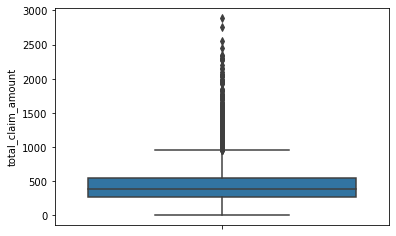

In [121]:
# guessing you mean the boxplot? b

for column in continuous_df:
    sns.boxplot(y=continuous_df[column])
    plt.show()


#### Did you find outliers? Comment what you will do with them.


In [122]:
continuous_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

There are several outliers for: 
customer_lifetime_value
monthly_premium_auto
total_claim_amount
For these columns, I would ideally bin then on a scale of 'Low', 'Moderate', 'High', 'Very High' 

#### Check all columns for NaN values. Decide what (if anything) you will need to do with them.

Is this a trick question? I checked this at the beginning and did not find any NaN values in my dataframe.

In [120]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

**Instructions**

1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

2. Find all of the categorical data. Save it in a categorical_df variable.

3. Check for NaN values.

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?

6. Does any column contain alpha and numeric data? Decide how to clean it.

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

#### Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

#### Find all of the categorical data. Save it in a categorical_df variable.


Technically we have two files, one containing the object dtype columns, and one containing the discrete data which classifies as categorical. 

But looking at the questions in this lab I am assuming you also want to include columns like date, and the numericals that we defined as discrete, so I will concatinate a categorical df below

In [142]:
categorical_df = pd.concat([customer_df_cat, discrete_df, customer_df['effective_to_date']], axis=1)
categorical_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,number_of_open_complaints,number_of_policies,effective_to_date
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,0,1,2011-02-24
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,0,8,2011-01-31
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,18,0,2,2011-02-19
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,18,0,7,2011-01-20
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,12,0,1,2011-02-03


#### Check for NaN values.


In [143]:
# again, trick question? there are nan (heh)
categorical_df.isna().sum()

customer                     0
state                        0
response                     0
coverage                     0
education                    0
employment_status            0
gender                       0
location_code                0
marital_status               0
policy_type                  0
policy                       0
renew_offer_type             0
sales_channel                0
vehicle_class                0
vehicle_size                 0
months_since_last_claim      0
number_of_open_complaints    0
number_of_policies           0
effective_to_date            0
dtype: int64

#### Check all unique values of columns.

In [144]:
# proud moment :D got to got to my imbalanced data lab and copy over my loop that I wrote 
# for just this purpose

for col in categorical_df.columns:
    print(categorical_df[col].value_counts(), '''
    ''')

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64 
    
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 
    
No     7826
Yes    1308
Name: response, dtype: int64 
    
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 
    
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 
    
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64 
    
F    4658
M    4476
Name: gender, dtype: int64 
    
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 
    
Married     5298
Single      2467
Divorced    1369
Name: 

#### Check dtypes. Do they all make sense as categorical data?

Apart from customer which we could just take out, I believe they all do, though we might want to look at months_since_last_claim which has 36 unique values and bin those for easier processing going foward. 

For columns renew_offer_type and response - I am unsure what they are supposed to represent. I would drop them unless I could get further clarification to their purpose.

effective_to_date could also be considered numerical. But in this case I would add it to categorical data as there are 59 unique variables only. 

In [145]:
categorical_df.dtypes

customer                             object
state                                object
response                             object
coverage                             object
education                            object
employment_status                    object
gender                               object
location_code                        object
marital_status                       object
policy_type                          object
policy                               object
renew_offer_type                     object
sales_channel                        object
vehicle_class                        object
vehicle_size                         object
months_since_last_claim               int64
number_of_open_complaints             int64
number_of_policies                    int64
effective_to_date            datetime64[ns]
dtype: object

In [141]:
categorical_df['months_since_last_claim'].nunique()

36

In [146]:
categorical_df['effective_to_date'].nunique()

59

#### Does any column contain alpha and numeric data? Decide how to clean it.

You must be referring to policy and renew_offer_type.

renew_offer_type is an easy fix, just take out the redundant 'Offer' and make them 1,2,3,4 accordingly. 

For policy I see two options:
1. Each category: personal, corporate and special have three sub-categories - these may be redundant. I would consider merging them into just personal, corporate respectively.
2. We could take out the redundant 'L' if we wished to preserve granularity - so personal 1,2 or 3 and so on
3. A hybrid approach of the two options above, keep personal 1,2 and 3 and merge the corporate and special ones each to their respective category

In [149]:
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [150]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [147]:
categorical_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,number_of_open_complaints,number_of_policies,effective_to_date
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,0,1,2011-02-24
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,0,8,2011-01-31
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,18,0,2,2011-02-19
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,18,0,7,2011-01-20
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,12,0,1,2011-02-03


#### Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [151]:
categorical_df['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

Again, I would take months_since_last_claim which has 36 unique values and bin those for easier processing going foward.

The dataset only has five unique state names, so I would keep those as they are. But for easier processing I could merge Nevada and Washington to 'Other'.

policy_type seems redundant, as policy basically reflects if they are corporate, private or special. I'd drop it.

These remaining columns below I would OneHot encode: 
employment_status
education
coverage
gender
location_code
marital_status
sales_channel
vehicle_class
vehicle_size


# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

**Instructions**

1. Open the categoricals variable we created before.

>categoricals = data.select_dtypes(np.object)

>categoricals.head()

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

https://github.com/NicolasVollmer/lab-feature-extraction

#### Open the categoricals variable we created before.

This time I assume you really just want the type object columns in one df. Which we created previously:

In [154]:
customer_df_cat.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### Plot all the categorical variables with the proper plot. What can you see?

In [160]:
# first dropping customer column
categoricals = customer_df_cat.drop('customer', axis=1).copy()

In [162]:
categoricals.head(1)

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize


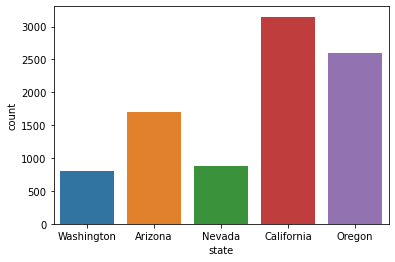

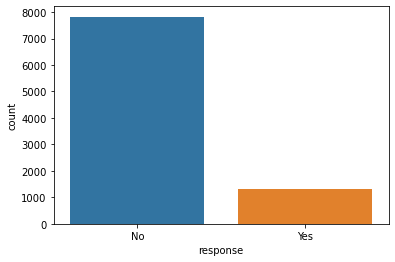

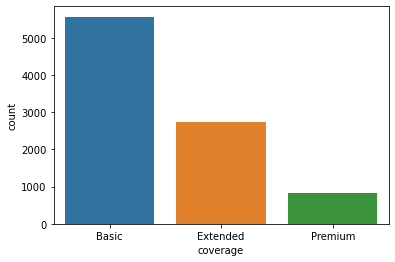

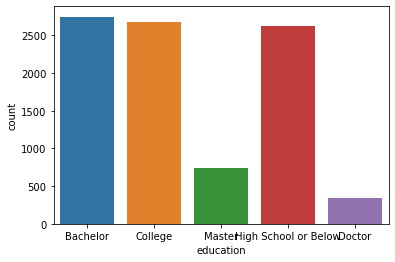

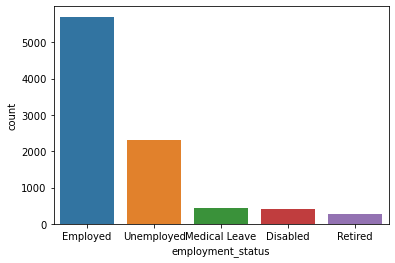

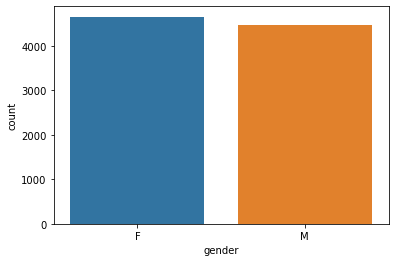

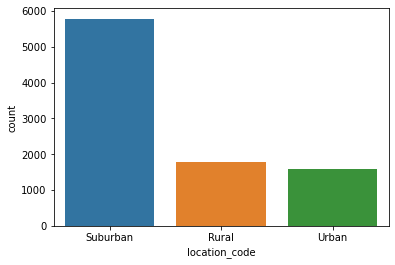

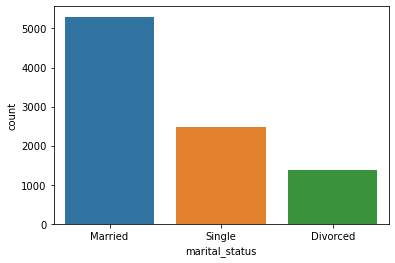

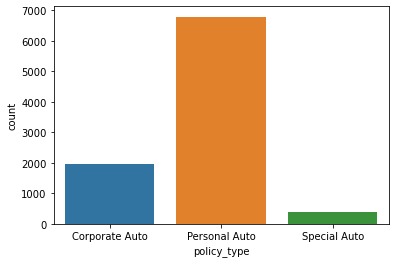

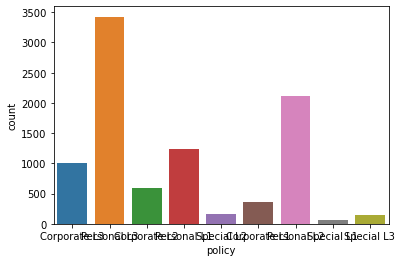

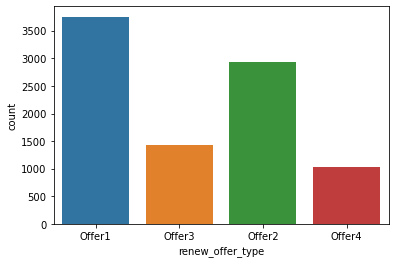

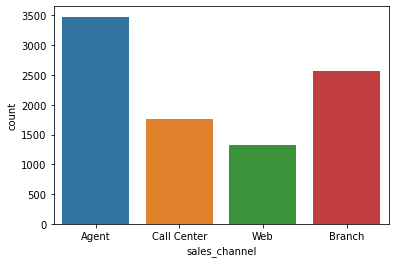

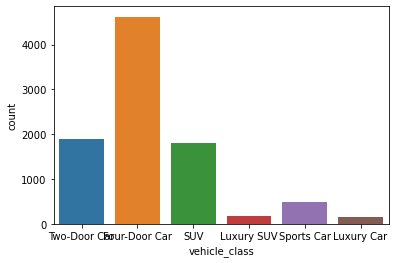

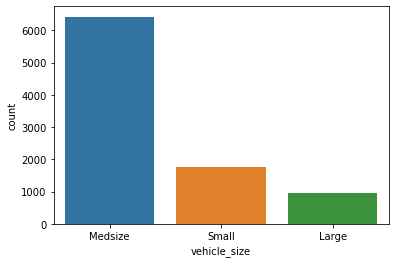

In [165]:
# I assume you want me to use my previously coded function? Happy to oblige:
discrete_plts(categoricals)

I spy with my little eye a bunch of bar charts visualising the bins of my categorical columns.

Most of our customers are from California and Oregon
We mostly sell basic coverage, like 60 to 70 percent of our total coverage sales.
Most customers have some level of higher education
Most are employed
More women than men, though not by much
Most are from suburbia
Most are married
We mostly appeal to end customers, not corporate or 'special'
No idea about renew type offer
Quite a few insurances are still sold by Agents or in Branches, online is surprisingly in the last place people shop our insurance
We mostly cover four door cars in the medsize range

#### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

As mentioned in my last lab, policy_type seems redundant, as policy basically reflects if they are corporate, private or special. I'd drop it.

response yes/no seems pretty useless. We don't really know what that is supposed to mean. Drop!

renew type offer also tells me nothing, I'd check correlation and might just drop it.

For our calculations, I assume we will not need sales_channel. Drop!

In [163]:
for col in categoricals.columns:
    print(categoricals[col].value_counts(), '''
    ''')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 
    
No     7826
Yes    1308
Name: response, dtype: int64 
    
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 
    
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 
    
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64 
    
F    4658
M    4476
Name: gender, dtype: int64 
    
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 
    
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 
    
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64 
    
Personal L3     3426
Personal L2     2122
Personal

#### Plot time variable. Can you extract something from it?

I think I may be missing the purpose of this question? I hypothesise that 'effective_to_date' could give insight that there are more claims filed in the winter months with icy road conditions but cannot see how to plot that out. Additionally, we don't really know for sure what effective to date truly relates to?

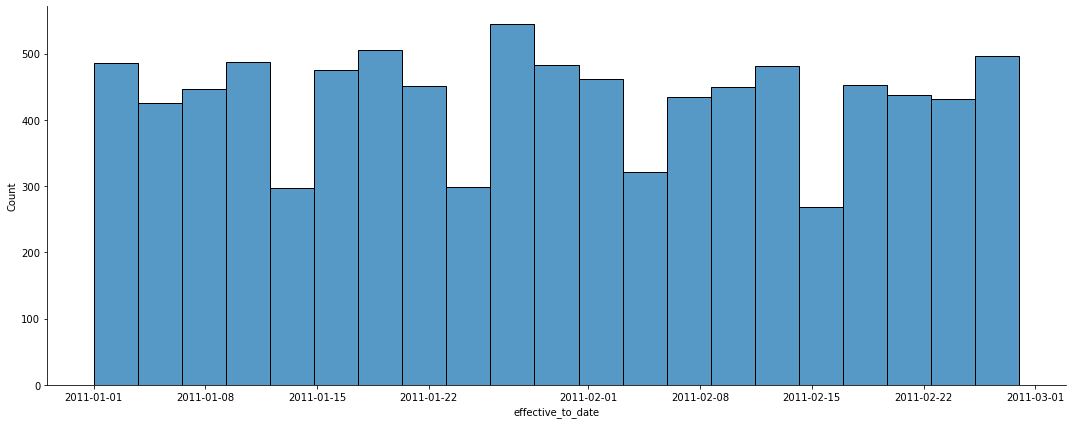

In [183]:
sns.displot(x=categorical_df['effective_to_date'], height=6, aspect=2.5)
plt.show()

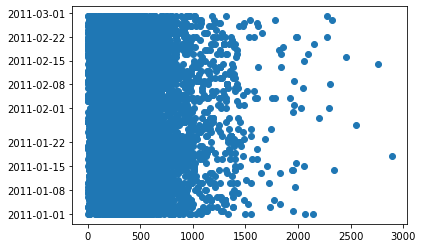

In [174]:
plt.scatter(customer_df['total_claim_amount'],categorical_df['effective_to_date'])

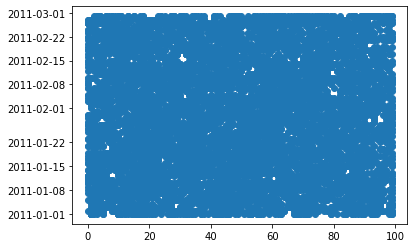

In [176]:
plt.scatter(customer_df['months_since_policy_inception'],categorical_df['effective_to_date'])